**Exploratory Data Analysis on the Walmart Dataset**

The M5 dataset contains hierarchical sales data, generously made available by Walmart, starting at the item level and aggregating to that of departments, product categories and stores in three geographical areas of the US: California, Texas, and Wisconsin.
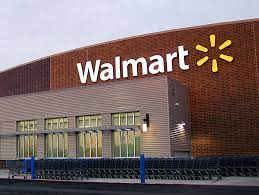

Here we  going to explore different features and time durations that plays an important role in the sale of the items across different stores. We will also try to cluster the stores_category that have similar sales.

In [ ]:
#importing liabrarys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
#loading the dataset
from google.colab import files
uploaded = files.upload()

Saving calendar.csv to calendar (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_train_evaluation.csv to sales_train_evaluation (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_train_validation.csv to sales_train_validation (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sell_prices.csv to sell_prices.csv


In [10]:
calendar = pd.read_csv('calendar (1).csv')
sample_submission = pd.read_csv('sample_submission.csv')
sell_prices = pd.read_csv('sell_prices.csv')
sales_train_validation = pd.read_csv('sales_train_validation (1).csv')
sales_train_evaluation = pd.read_csv('sales_train_evaluation (1).csv')

In [11]:
calendar.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [12]:
calendar['d'].unique()

array(['d_1', 'd_2', 'd_3', ..., 'd_1967', 'd_1968', 'd_1969'],
      dtype=object)

Calendar dataset contains columns like 'date', 'weekday', 'wday', 'month' and 'year' etc which basically indicates the overall duration across which this dataset was made.

It also contains columns like 'event_name_1', 'event_name_2' which represents whether there was any holiday or event like christmas, father's day, etc that can lead to an increase in the sales of the items.

In [13]:
sales_train_validation.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,3.0,4.0,2.0,1.0,4.0,1.0,3.0,5.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,5.0,4.0,2.0,0.0,3.0,0.0,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,3.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [14]:
sales_train_validation.shape

(25818, 1919)

From the sales_trainvalidation dataset given above we can observe that there are 30490 rows and 1919 columns, and if we observe the columns having 'd' in it's name, we can conclude that sales data for 1913 days have been provided to us.

In [15]:
sales_train_validation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [16]:
sales_train_validation['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

And within each categories, there are different departments. For example: for Hobbies category we have departments like Hobbies_1 and Hobbies_2. Similarly for Household and Foods categories

In [17]:
sales_train_validation['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [18]:
sales_train_validation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2'], dtype=object)

The sales for three states: California, Texas and Wisconsin has been provided. And within each state, there are different stores for example: CA_1, CA_2, CA_3, and CA_4 in California.

In [19]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [20]:
sell_prices['item_id'].nunique()

3049

In [21]:
sales_train_validation['store_id'].value_counts()

CA_1    3049
TX_3    3049
TX_1    3049
TX_2    3049
WI_1    3049
CA_4    3049
CA_2    3049
CA_3    3049
WI_2    1426
Name: store_id, dtype: int64

# Calendar

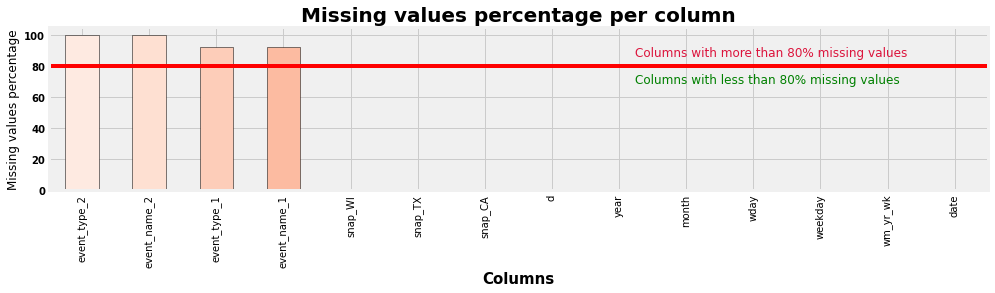

In [22]:
import matplotlib.pyplot as plt 
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(calendar, 80, color=sns.color_palette('Reds',15))

We can observe that more than 80% of the values are missing for columns "event_name_2", "event_type_2", "event_name_1", "event_type_1". Therefore, we will remove thses columns.

In [23]:
calendar.drop(["event_name_2", "event_type_2", "event_name_1", "event_type_1"], axis = 1, inplace = True)

In [24]:
calendar.isnull().sum()

date        0
wm_yr_wk    0
weekday     0
wday        0
month       0
year        0
d           0
snap_CA     0
snap_TX     0
snap_WI     0
dtype: int64

**Exploratory Data Analysis**

In [25]:
df = sales_train_validation

In [26]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,3.0,4.0,2.0,1.0,4.0,1.0,3.0,5.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,5.0,4.0,2.0,0.0,3.0,0.0,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,3.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


# Sales of Random Items

Let's analyze the sales of a random item say: FOODS_3_090_CA_3_validation. This id means the sales of 'FOODS_3_090' item in the store 'CA_3'.


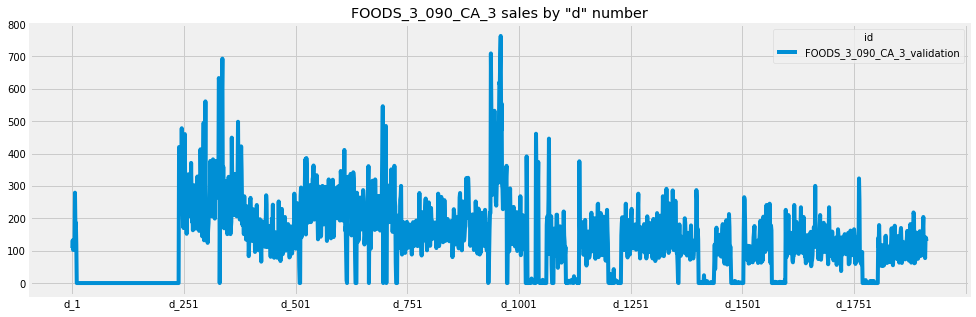

In [27]:
from itertools import cycle
import matplotlib.pyplot as plt

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

dcols = [c for c in df.columns if 'd_' in c] ## Represents the days(d_1 -> d_1913)

df.loc[df['id'] == 'FOODS_3_090_CA_3_validation'].set_index('id')[dcols].T.plot(
figsize = (15, 5), title='FOODS_3_090_CA_3 sales by "d" number', color = next(color_cycle))
plt.show()

In [28]:
calendar[['d','date','wm_yr_wk', 'weekday', 'wday', 'month', 'year']].head()

,d,date,wm_yr_wk,weekday,wday,month,year
0,d_1,2011-01-29,11101,Saturday,1,1,2011
1,d_2,2011-01-30,11101,Sunday,2,1,2011
2,d_3,2011-01-31,11101,Monday,3,1,2011
3,d_4,2011-02-01,11101,Tuesday,4,2,2011
4,d_5,2011-02-02,11101,Wednesday,5,2,2011


In [29]:
example = df.loc[df['id'] == 'FOODS_3_090_CA_3_validation'][dcols].T # Col name will be 8412
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Rename the column to FOODS_3_090_CA_3
example = example.reset_index().rename(columns={'index': 'd'}) # make the index d_1, d_2...d_1913
example = example.merge(calendar, how='left', validate='1:1')
example.head(5)

,d,FOODS_3_090_CA_3,date,wm_yr_wk,weekday,wday,month,year,snap_CA,snap_TX,snap_WI
0,d_1,108.0,2011-01-29,11101,Saturday,1,1,2011,0,0,0
1,d_2,132.0,2011-01-30,11101,Sunday,2,1,2011,0,0,0
2,d_3,102.0,2011-01-31,11101,Monday,3,1,2011,0,0,0
3,d_4,120.0,2011-02-01,11101,Tuesday,4,2,2011,1,1,0
4,d_5,106.0,2011-02-02,11101,Wednesday,5,2,2011,1,0,1


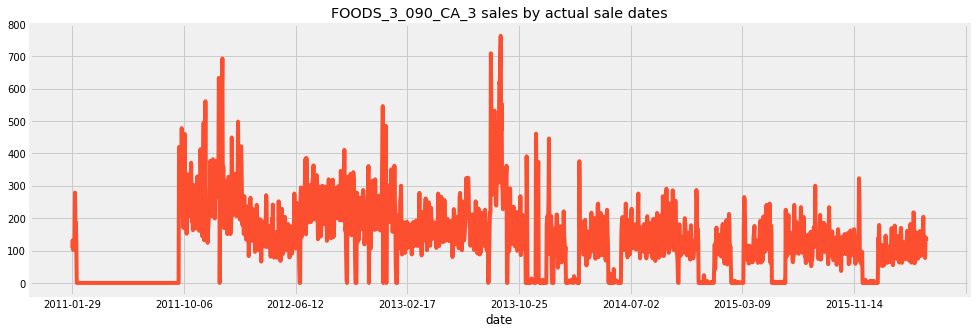

In [30]:
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

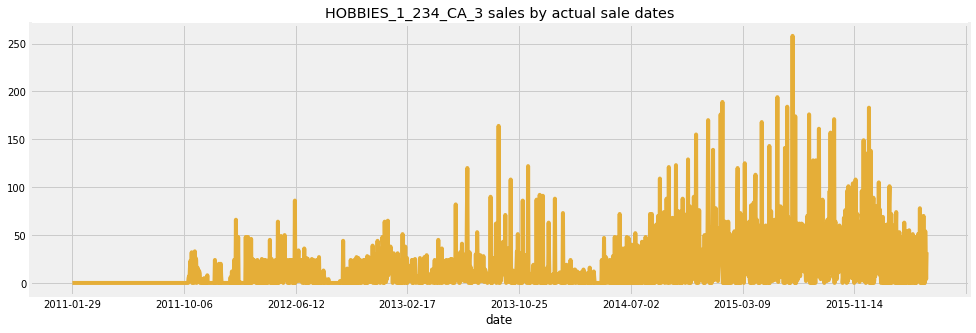

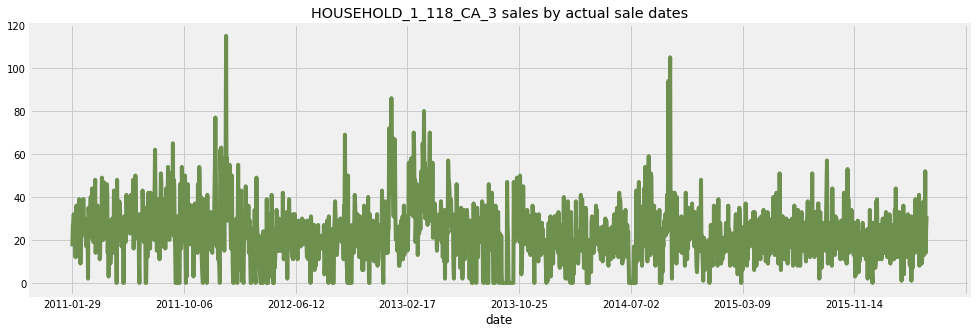

In [31]:
# Select more top selling examples
example2 = df.loc[df['id'] == 'HOBBIES_1_234_CA_3_validation'][dcols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'}) 
example2 = example2.merge(calendar, how='left', validate='1:1')

example2.set_index('date')['HOBBIES_1_234_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOBBIES_1_234_CA_3 sales by actual sale dates')
plt.show()

example3 = df.loc[df['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][dcols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(calendar, how='left', validate='1:1')

example3.set_index('date')['HOUSEHOLD_1_118_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='HOUSEHOLD_1_118_CA_3 sales by actual sale dates')
plt.show()

In [32]:
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

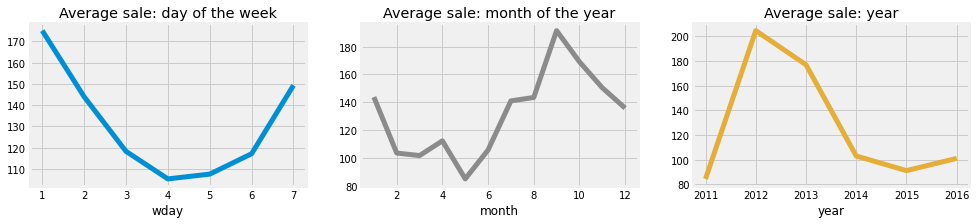

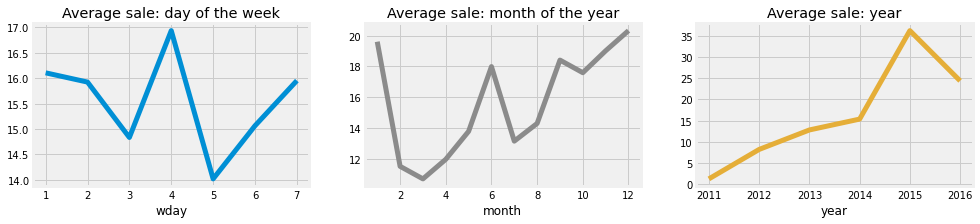

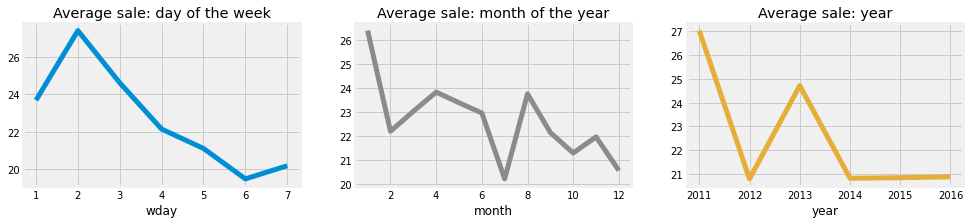

In [33]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]

for i in range(0, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 3))
    
    example_df[i].groupby('wday').mean()[examples[i]].plot(
    kind = 'line', lw = 5, title = 'Average sale: day of the week', ax = ax1, 
        color = color_pal[0])
    
    example_df[i].groupby('month').mean()[examples[i]].plot(
    kind = 'line', lw = 5, title = 'Average sale: month of the year', ax = ax2, 
        color = color_pal[4])
    
    example_df[i].groupby('year').mean()[examples[i]].plot(
    kind = 'line', lw = 5, title = 'Average sale: year', ax = ax3, 
        color = color_pal[2])
plt.show()

Its surprising that for the items "HOBBIES_1_234_CA_3", the sale is peaking on the 4th day, instead of Saturday and Sunday, because for rest of the items the average sales is highest for 1st and 2nd day and then goes down for the rest of the days.

The sales of the item "HOUSEHOLD_1_118_CA_3" was very close to zero or was zero, maybe the sales of the product was discontinued.

There was a constant rise in the sales of the item "HOBBIES_1_234_CA_3" till 2015, after that it went down drastically.

In [34]:
twenty_examples = df.sample(20, random_state = 529).set_index('id')[dcols].T.merge(
calendar.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1').set_index('date')

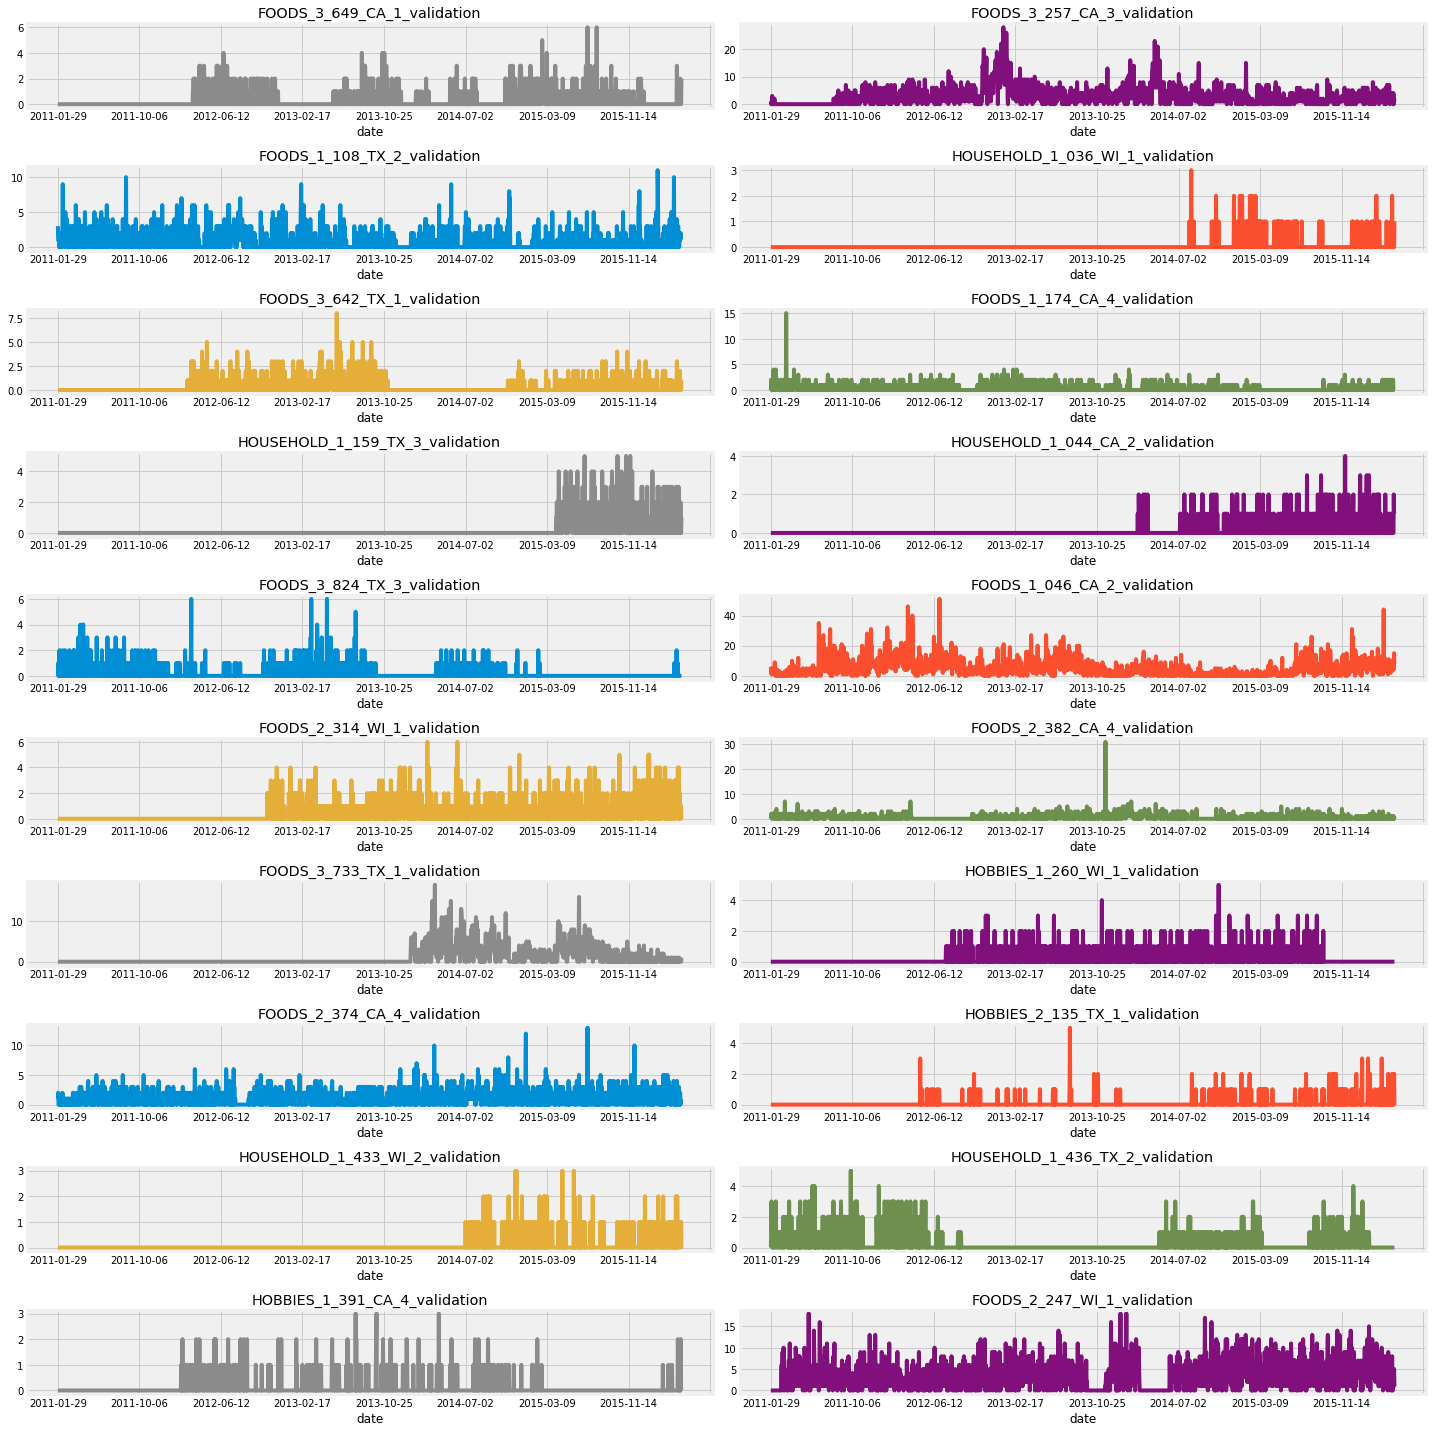

In [35]:
fig, axs = plt.subplots(10, 2, figsize = (20, 20))
axs = axs.flatten()

ax_idx = 0

for item in twenty_examples.columns:
    twenty_examples[item].plot(
    title = item, color = next(color_cycle),
    ax = axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

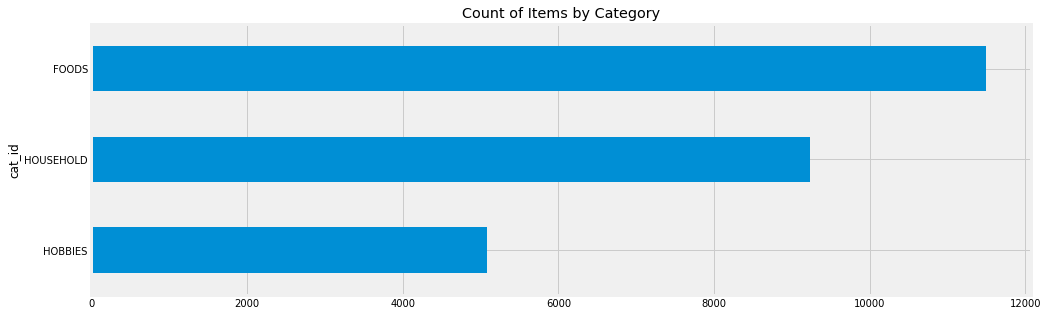

In [36]:
#Category
df.groupby('cat_id').count()['id'].sort_values().plot(kind = 'barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

In [37]:
past_sales = df.set_index('id')[dcols].T.merge(calendar.set_index('d')['date'], left_index = True, right_index = True, validate = '1:1').set_index('date')

In [38]:
past_sales.head(5)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBIES_1_034_CA_1_validation,HOBBIES_1_035_CA_1_validation,HOBBIES_1_036_CA_1_validation,HOBBIES_1_037_CA_1_validation,HOBBIES_1_038_CA_1_validation,HOBBIES_1_039_CA_1_validation,HOBBIES_1_040_CA_1_validation,...,HOUSEHOLD_2_291_WI_2_validation,HOUSEHOLD_2_292_WI_2_validation,HOUSEHOLD_2_293_WI_2_validation,HOUSEHOLD_2_294_WI_2_validation,HOUSEHOLD_2_295_WI_2_validation,HOUSEHOLD_2_296_WI_2_validation,HOUSEHOLD_2_297_WI_2_validation,HOUSEHOLD_2_298_WI_2_validation,HOUSEHOLD_2_299_WI_2_validation,HOUSEHOLD_2_300_WI_2_validation,HOUSEHOLD_2_301_WI_2_validation,HOUSEHOLD_2_302_WI_2_validation,HOUSEHOLD_2_303_WI_2_validation,HOUSEHOLD_2_304_WI_2_validation,HOUSEHOLD_2_305_WI_2_validation,HOUSEHOLD_2_306_WI_2_validation,HOUSEHOLD_2_307_WI_2_validation,HOUSEHOLD_2_308_WI_2_validation,HOUSEHOLD_2_309_WI_2_validation,HOUSEHOLD_2_310_WI_2_validation,HOUSEHOLD_2_311_WI_2_validation,HOUSEHOLD_2_312_WI_2_validation,HOUSEHOLD_2_313_WI_2_validation,HOUSEHOLD_2_314_WI_2_validation,HOUSEHOLD_2_315_WI_2_validation,HOUSEHOLD_2_316_WI_2_validation,HOUSEHOLD_2_317_WI_2_validation,HOUSEHOLD_2_318_WI_2_validation,HOUSEHOLD_2_319_WI_2_validation,HOUSEHOLD_2_320_WI_2_validation,HOUSEHOLD_2_321_WI_2_validation,HOUSEHOLD_2_322_WI_2_validation,HOUSEHOLD_2_323_WI_2_validation,HOUSEHOLD_2_324_WI_2_validation,HOUSEHOLD_2_325_WI_2_validation,HOUSEHOLD_2_326_WI_2_validation,HOUSEHOLD_2_327_WI_2_validation,HOUSEHOLD_2_328_WI_2_validation,HOUSEHOLD_2_329_WI_2_validation,HOUSEHOLD_2_330_WI_2_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.

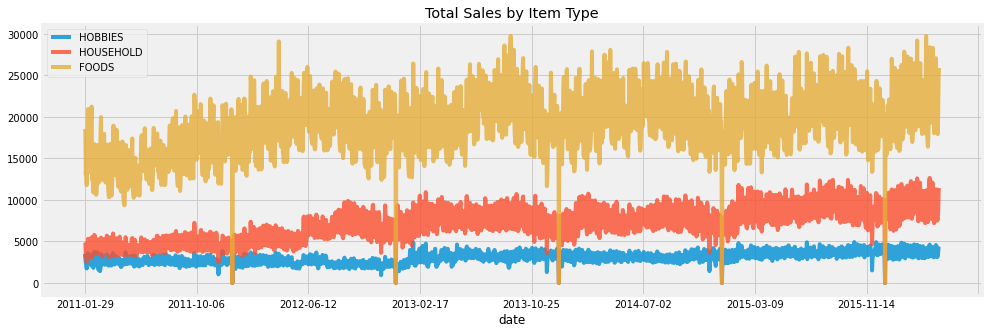

In [39]:
for i in df['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col].sum(axis = 1).plot(figsize = (15, 5), alpha = 0.8, title = 'Total Sales by Item Type')
plt.legend(df['cat_id'].unique())
plt.show()

The sales of the FOODS items is much much more than the HOUSEHOLD and HOBBIES category. You might be wondering why there is a certain dip in the sales for all the categories on a particular date, that's because it was a chritmas on those days.

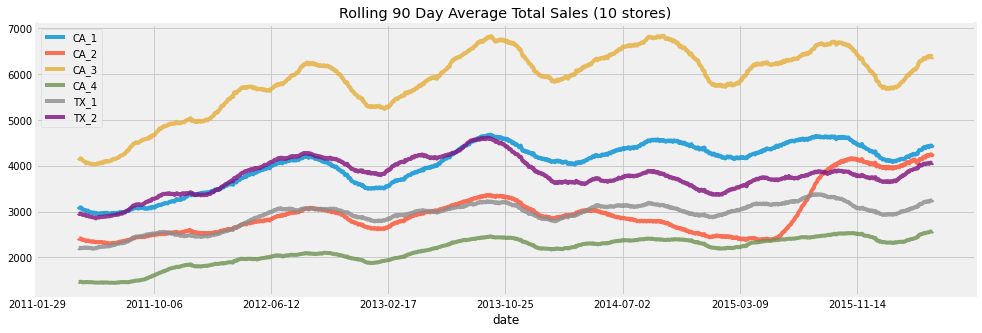

In [40]:
store_list = sell_prices['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()
## Average sales of itmes in each store on 90 days average.

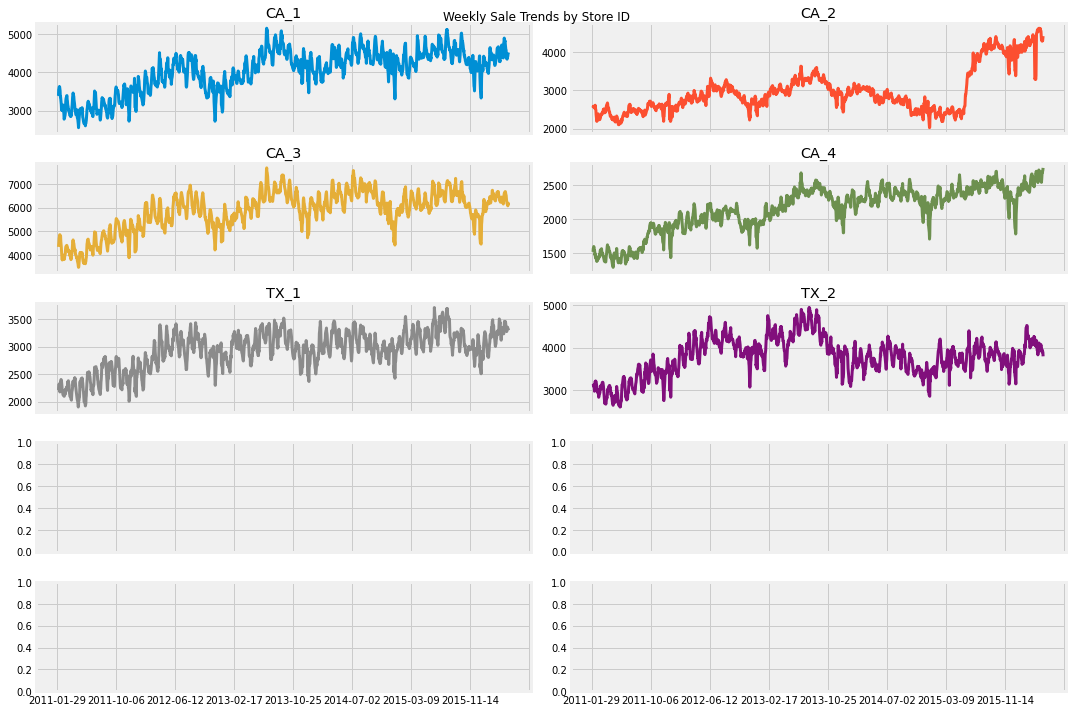

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()

In [42]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

greens = ["mediumaquamarine", "mediumseagreen", "seagreen", "green"]
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = [] ## Mean sale of each store across all duration.
stores = [] ## Unique Store ids
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean() ## Rolling 90 days average
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=greens[i])))
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (California)")

In [43]:
#Sales Distribution
calendar1 = calendar[['date', 'weekday', 'wday', 'month', 'year']]

In [44]:
calendar1.head()

,date,weekday,wday,month,year
0,2011-01-29,Saturday,1,1,2011
1,2011-01-30,Sunday,2,1,2011
2,2011-01-31,Monday,3,1,2011
3,2011-02-01,Tuesday,4,2,2011
4,2011-02-02,Wednesday,5,2,2011


In [45]:
past_sales1 = past_sales.merge(calendar1.set_index('date'), left_index = True, right_index = True, validate = '1:1')

In [46]:
past_sales1.head()

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBIES_1_034_CA_1_validation,HOBBIES_1_035_CA_1_validation,HOBBIES_1_036_CA_1_validation,HOBBIES_1_037_CA_1_validation,HOBBIES_1_038_CA_1_validation,HOBBIES_1_039_CA_1_validation,HOBBIES_1_040_CA_1_validation,...,HOUSEHOLD_2_295_WI_2_validation,HOUSEHOLD_2_296_WI_2_validation,HOUSEHOLD_2_297_WI_2_validation,HOUSEHOLD_2_298_WI_2_validation,HOUSEHOLD_2_299_WI_2_validation,HOUSEHOLD_2_300_WI_2_validation,HOUSEHOLD_2_301_WI_2_validation,HOUSEHOLD_2_302_WI_2_validation,HOUSEHOLD_2_303_WI_2_validation,HOUSEHOLD_2_304_WI_2_validation,HOUSEHOLD_2_305_WI_2_validation,HOUSEHOLD_2_306_WI_2_validation,HOUSEHOLD_2_307_WI_2_validation,HOUSEHOLD_2_308_WI_2_validation,HOUSEHOLD_2_309_WI_2_validation,HOUSEHOLD_2_310_WI_2_validation,HOUSEHOLD_2_311_WI_2_validation,HOUSEHOLD_2_312_WI_2_validation,HOUSEHOLD_2_313_WI_2_validation,HOUSEHOLD_2_314_WI_2_validation,HOUSEHOLD_2_315_WI_2_validation,HOUSEHOLD_2_316_WI_2_validation,HOUSEHOLD_2_317_WI_2_validation,HOUSEHOLD_2_318_WI_2_validation,HOUSEHOLD_2_319_WI_2_validation,HOUSEHOLD_2_320_WI_2_validation,HOUSEHOLD_2_321_WI_2_validation,HOUSEHOLD_2_322_WI_2_validation,HOUSEHOLD_2_323_WI_2_validation,HOUSEHOLD_2_324_WI_2_validation,HOUSEHOLD_2_325_WI_2_validation,HOUSEHOLD_2_326_WI_2_validation,HOUSEHOLD_2_327_WI_2_validation,HOUSEHOLD_2_328_WI_2_validation,HOUSEHOLD_2_329_WI_2_validation,HOUSEHOLD_2_330_WI_2_validation,weekday,wday,month,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,Saturday,1,1,2011
2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Sunday,2,1,2011
2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Monday,3,1,2011
2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tuesday,4,2,2011
2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0

In [47]:
#Store Level
axes = axes.flatten()
ax_idx = 0
stores = df['store_id'].unique()
for store in stores:
    store_items = [c for c in past_sales1.columns if store in c]
    past_sales1[store_items] \
        .sum(axis=1) \
        .plot(alpha=1,
              kind = "hist",
              ax=axes[ax_idx],
              title=store,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Stores')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

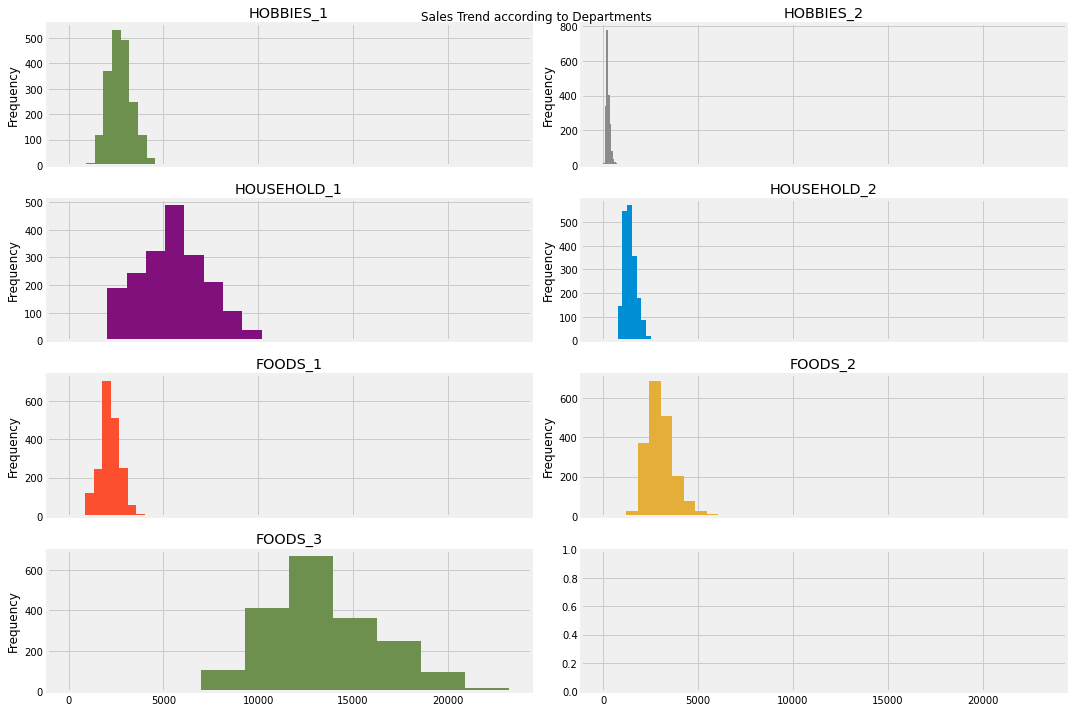

In [48]:
#Department Wise
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
depts = df['dept_id'].unique()
for dept in depts:
    dept_items = [c for c in past_sales1.columns if dept in c]
    past_sales1[dept_items] \
        .sum(axis=1) \
        .plot(alpha=1,
              kind = "hist",
              ax=axes[ax_idx],
              title=dept,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()

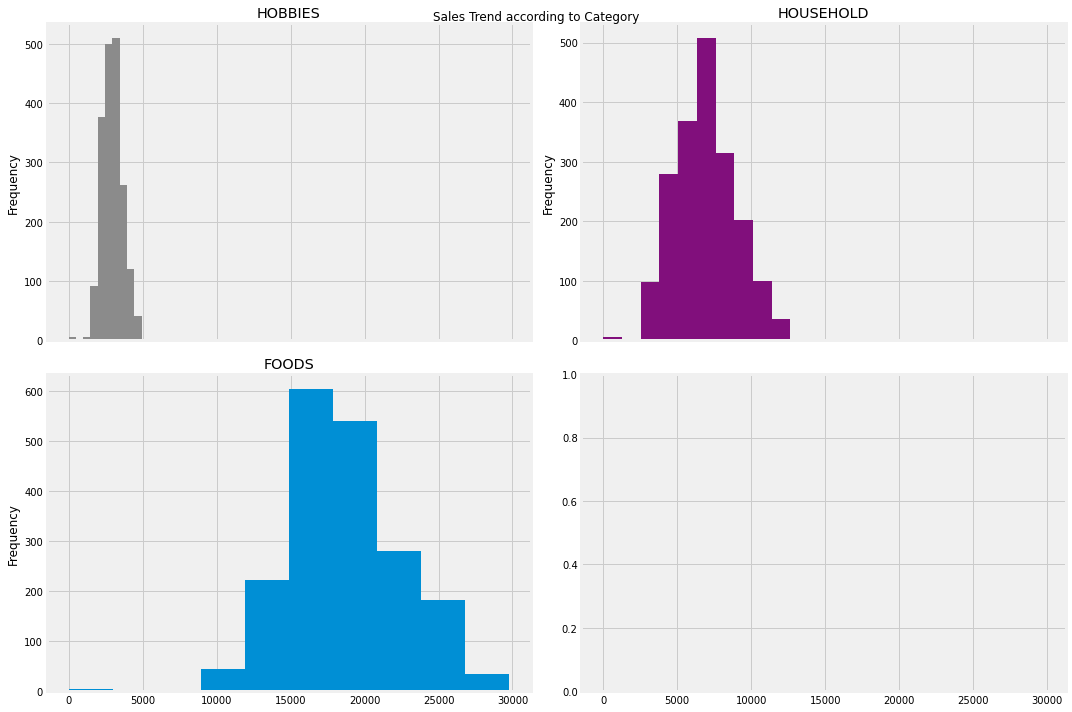

In [49]:
#Category Wise
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
cats = df['cat_id'].unique()
for cat in cats:
    cat_items = [c for c in past_sales1.columns if cat in c]
    past_sales1[cat_items] \
        .sum(axis=1) \
        .plot(alpha=1,
              kind = "hist",
              ax=axes[ax_idx],
              title=cat,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Category')
plt.tight_layout()
plt.show()

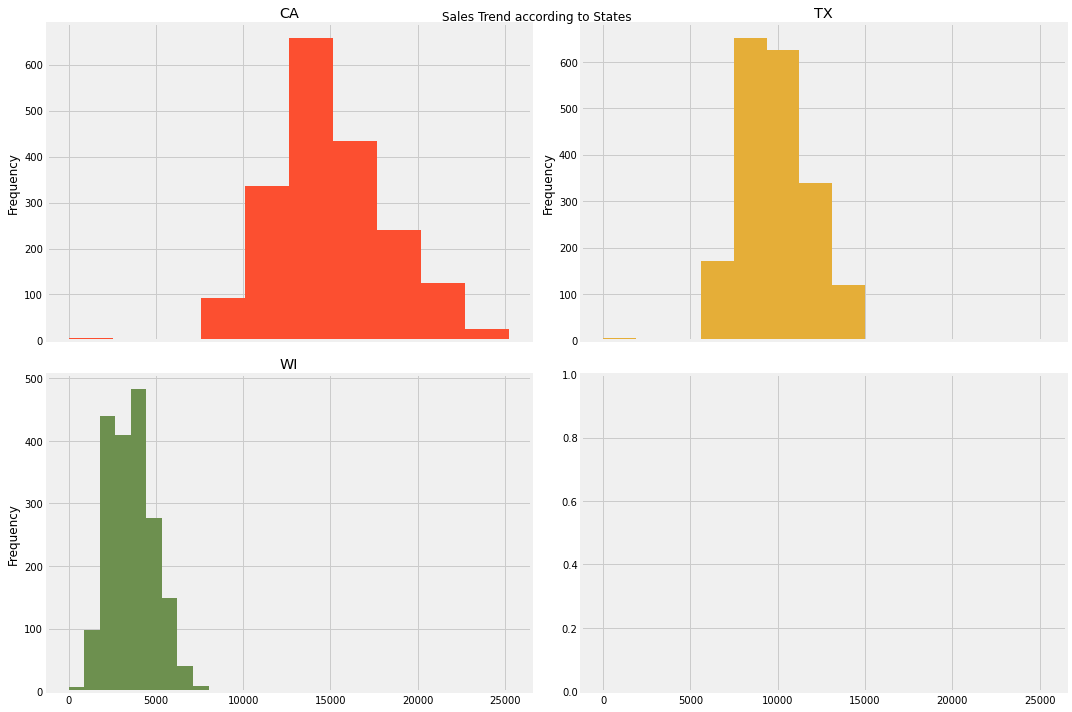

In [50]:
#State Wise
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
states = df['state_id'].unique()
for state in states:
    state_items = [c for c in past_sales1.columns if state in c]
    past_sales1[state_items] \
        .sum(axis=1) \
        .plot(alpha=1,
              kind = "hist",
              ax=axes[ax_idx],
              title=state,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Sales Trend according to States')
plt.tight_layout()
plt.show()

Summers

In US, June, July, and August are considered to be the summer months, therefore now we will aggregate data across these months.

In [51]:
salesSummer = past_sales1[(past_sales1['month'] == 6) | (past_sales1['month'] == 7) | (past_sales1['month'] == 8)]

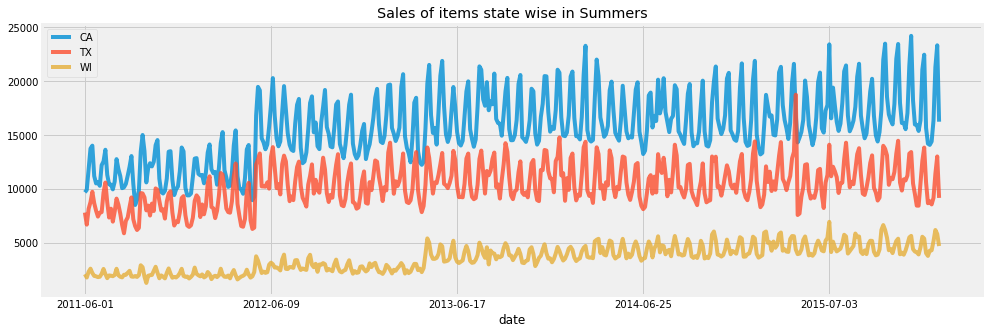

In [52]:
#by state
states = df['state_id'].unique()
for state in states:
    cols = [c for c in salesSummer.columns if state in c]
    salesSummer[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items state wise in Summers')
plt.legend(states)
plt.show() 

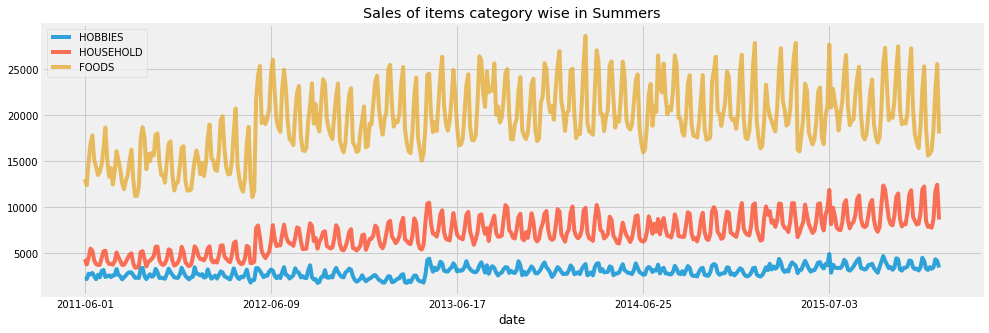

In [53]:
#category wise
categories = df['cat_id'].unique()
for cat in categories:
    cols = [c for c in salesSummer.columns if cat in c]
    salesSummer[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items category wise in Summers')
plt.legend(categories)
plt.show()

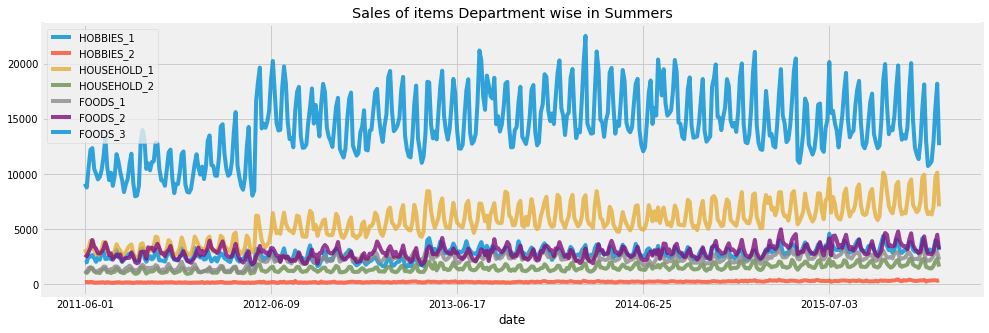

In [54]:
#department wise
depts = df['dept_id'].unique()
for dept in depts:
    cols = [c for c in salesSummer.columns if dept in c]
    salesSummer[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items Department wise in Summers')
plt.legend(depts)
plt.show()

(array([22., 38., 52., 93., 94., 56., 42., 43., 16.,  4.]),
 array([ 7962. ,  9417.5, 10873. , 12328.5, 13784. , 15239.5, 16695. ,
        18150.5, 19606. , 21061.5, 22517. ]),
 <a list of 10 Patch objects>)

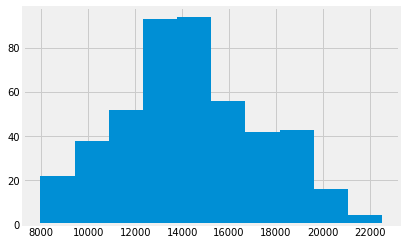

In [55]:
#foods_3
plt.hist(salesSummer[cols].sum(axis = 1))

Sales during Christmas or in December
Christmas is a festival where we would expect the sales of the items to be higher as compared to all other days as people tend to buy a lot of stuff for their home as well as for gifting purposes. In order to analyze the sales during Christmas, we will take into account the whole December.

In [56]:
salesChristmas = past_sales1[past_sales1['month'] == 12]

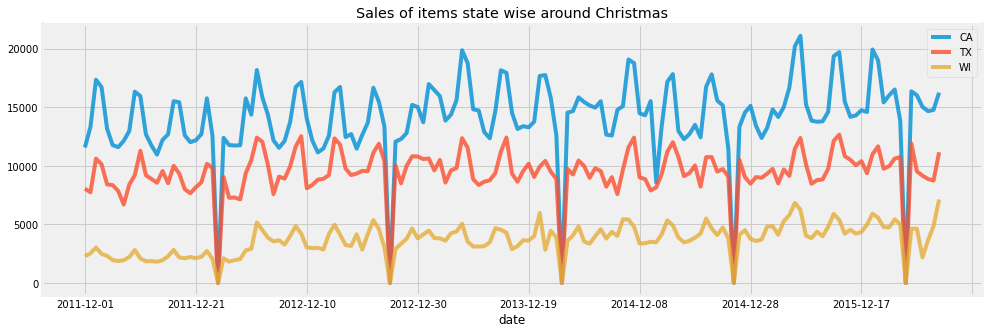

In [57]:
states = df['state_id'].unique()
for state in states:
    cols = [c for c in salesChristmas.columns if state in c]
    salesChristmas[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items state wise around Christmas')
plt.legend(states)
plt.show() 

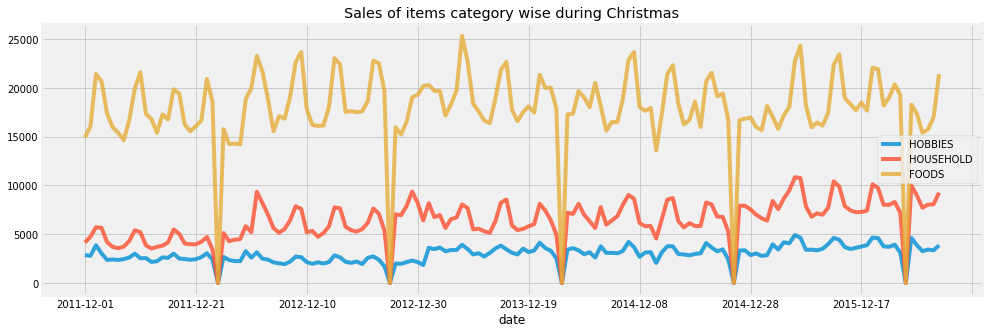

In [58]:
categories = df['cat_id'].unique()
for cat in categories:
    cols = [c for c in salesChristmas.columns if cat in c]
    salesChristmas[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items category wise during Christmas')
plt.legend(categories)
plt.show()

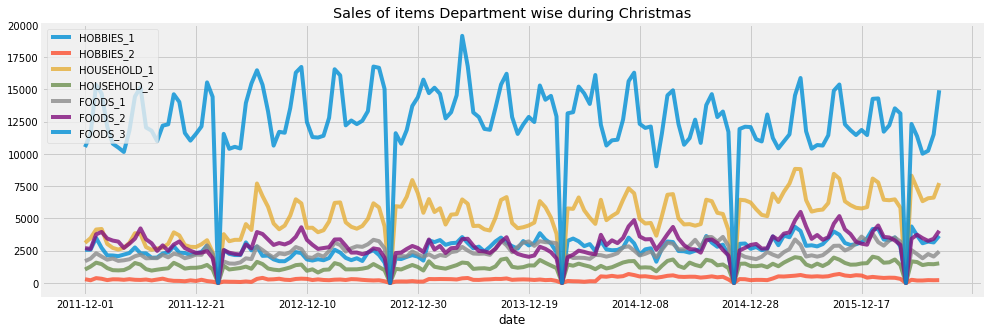

In [59]:
depts = df['dept_id'].unique()
for dept in depts:
    cols = [c for c in salesChristmas.columns if dept in c]
    salesChristmas[cols] \
        .sum(axis=1).plot(figsize=(15, 5),
              alpha=0.8,
              title='Sales of items Department wise during Christmas')
plt.legend(depts)
plt.show()

Stores and Categories Clustering
If we want to group together the stores according to the departments,we can club together the sales across stores for each category. Don't worry it will be clear going ahead.

In [60]:
df['store_id'].unique() ## These are all the stores.

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2'], dtype=object)

In [61]:
df['dept_id'].unique() ## These are all the departments.

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [62]:
stores = df['store_id'].unique()
depts = df['dept_id'].unique()
a = []
concat = []
for store in stores:
    for dept in depts:
        concat.append(store+'_'+dept)
        cols = [c for c in past_sales1 if store in c and dept in c]
        a.append(past_sales1[cols].sum(axis=1).values)

In [63]:
final = {}
for i in range(0, len(a)):
    final[concat[i]] = a[i]

In [64]:
final.keys()

dict_keys(['CA_1_HOBBIES_1', 'CA_1_HOBBIES_2', 'CA_1_HOUSEHOLD_1', 'CA_1_HOUSEHOLD_2', 'CA_1_FOODS_1', 'CA_1_FOODS_2', 'CA_1_FOODS_3', 'CA_2_HOBBIES_1', 'CA_2_HOBBIES_2', 'CA_2_HOUSEHOLD_1', 'CA_2_HOUSEHOLD_2', 'CA_2_FOODS_1', 'CA_2_FOODS_2', 'CA_2_FOODS_3', 'CA_3_HOBBIES_1', 'CA_3_HOBBIES_2', 'CA_3_HOUSEHOLD_1', 'CA_3_HOUSEHOLD_2', 'CA_3_FOODS_1', 'CA_3_FOODS_2', 'CA_3_FOODS_3', 'CA_4_HOBBIES_1', 'CA_4_HOBBIES_2', 'CA_4_HOUSEHOLD_1', 'CA_4_HOUSEHOLD_2', 'CA_4_FOODS_1', 'CA_4_FOODS_2', 'CA_4_FOODS_3', 'TX_1_HOBBIES_1', 'TX_1_HOBBIES_2', 'TX_1_HOUSEHOLD_1', 'TX_1_HOUSEHOLD_2', 'TX_1_FOODS_1', 'TX_1_FOODS_2', 'TX_1_FOODS_3', 'TX_2_HOBBIES_1', 'TX_2_HOBBIES_2', 'TX_2_HOUSEHOLD_1', 'TX_2_HOUSEHOLD_2', 'TX_2_FOODS_1', 'TX_2_FOODS_2', 'TX_2_FOODS_3', 'TX_3_HOBBIES_1', 'TX_3_HOBBIES_2', 'TX_3_HOUSEHOLD_1', 'TX_3_HOUSEHOLD_2', 'TX_3_FOODS_1', 'TX_3_FOODS_2', 'TX_3_FOODS_3', 'WI_1_HOBBIES_1', 'WI_1_HOBBIES_2', 'WI_1_HOUSEHOLD_1', 'WI_1_HOUSEHOLD_2', 'WI_1_FOODS_1', 'WI_1_FOODS_2', 'WI_1_FOODS_3

In [65]:
store_dept = pd.DataFrame(final)
store_dept.head()

,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3
0,528.0,28.0,361.0,181.0,297.0,674.0,2268.0,522.0,16.0,529.0,234.0,406.0,212.0,1575.0,531.0,19.0,457.0,286.0,341.0,627.0,2478.0,158.0,0.0,180.0,64.0,113.0,351.0,759.0,241.0,10.0,418.0,106.0,152.0,390.0,1239.0,364.0,21.0,480.0,199.0,210.0,534.0,2044.0,232.0,11.0,383.0,120.0,138.0,460.0,1686.0,598.0,17.0,360.0,148.0,343.0,108.0,1130.0,180.0,10.0,353.0,62.0,0.0,0.0,0.0
1,489.0,9.0,350.0,170.0,284.0,655.0,2198.0,381.0,16.0,461.0,267.0,408.0,227.0,1286.0,401.0,29.0,521.0,341.0,326.0,758.0,2451.0,231.0,5.0,183.0,89.0,124.0,347.0,798.0,246.0,18.0,372.0,148.0,154.0,369.0,1380.0,320.0,39.0,525.0,183.0,169.0,584.0,2117.0,209.0,38.0,364.0,138.0,123.0,473.0,1661.0,433.0,10.0,273.0,151.0,306.0,83.0,938.0,120.0,7.0,268.0,55.0,0.0,0.0,0.0
2,409.0,6.0,279.0,114.0,214.0,396.0,1398.0,352.0,16.0,306.0,158.0,238.0,138.0,913.0,414.0,24.0,415.0,231.0,260.0,544.0,1897.0,247.0,4.0,116.0,73.0,75.0,237.0,634.0,96.0,11.0,269.0,69.0,109.0,255.0,1013.0,194.0,35.0,303.0,117.0,159.0,390.0,1533.0,145.0,45.0,273.0,97.0,113.0,363.0,1189.0,317.0,6.0,196.0,66.0,208.0,77.0,692.0,95.0,18.0,250.0,36.0,0.0,0.0,0.0
3,383.0,9.0,278.0,123.0,175.0,476.0,1607.0,344.0,6.0,270.0,164.0,240.0,174.0,1126.0,395.0,29.0,480.0,264.0,231.0,549.0,2284.0,230.0,9.0,120.0,79.0,97.0,253.0,652.0,229.0,19.0,276.0,91.0,126.0,418.0,1099.0,332.0,27.0,307.0,108.0,107.0,472.0,1601.0,195.0,7.0,237.0,83.0,84.0,426.0,1137.0,131.0,6.0,132.0,47.0,145.0,61.0,729.0,109.0,15.0,305.0,50.0,0.0,0.0,0.0
4,263.0,5.0,195.0,135.0,182.0,354.0,1496.0,283.0,13.0,217.0,151.0,220.0,102.0,956.0,344.0,20.0,420.0,272.0,220.0,543.0,1998.0,249.0,4.0,103.0,73.0,107.0,240.0,760.0,91.0,11.0,196.0,67.0,108.0,356.0,865.0,231.0,26.0,247.0,98.0,128.0,419.0,1343.0,126.0,16.0,155.0,46.0,61.0,368.0,954.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,1.0,118.0,23.0,0.0,0.0,0.0


In [66]:
store_dept['date'] = calendar['date']
store_dept['month'] = calendar['month']

In [67]:
store_dept.head()

,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,date,month
0,528.0,28.0,361.0,181.0,297.0,674.0,2268.0,522.0,16.0,529.0,234.0,406.0,212.0,1575.0,531.0,19.0,457.0,286.0,341.0,627.0,2478.0,158.0,0.0,180.0,64.0,113.0,351.0,759.0,241.0,10.0,418.0,106.0,152.0,390.0,1239.0,364.0,21.0,480.0,199.0,210.0,534.0,2044.0,232.0,11.0,383.0,120.0,138.0,460.0,1686.0,598.0,17.0,360.0,148.0,343.0,108.0,1130.0,180.0,10.0,353.0,62.0,0.0,0.0,0.0,2011-01-29,1
1,489.0,9.0,350.0,170.0,284.0,655.0,2198.0,381.0,16.0,461.0,267.0,408.0,227.0,1286.0,401.0,29.0,521.0,341.0,326.0,758.0,2451.0,231.0,5.0,183.0,89.0,124.0,347.0,798.0,246.0,18.0,372.0,148.0,154.0,369.0,1380.0,320.0,39.0,525.0,183.0,169.0,584.0,2117.0,209.0,38.0,364.0,138.0,123.0,473.0,1661.0,433.0,10.0,273.0,151.0,306.0,83.0,938.0,120.0,7.0,268.0,55.0,0.0,0.0,0.0,2011-01-30,1
2,409.0,6.0,279.0,114.0,214.0,396.0,1398.0,352.0,16.0,306.0,158.0,238.0,138.0,913.0,414.0,24.0,415.0,231.0,260.0,544.0,1897.0,247.0,4.0,116.0,73.0,75.0,237.0,634.0,96.0,11.0,269.0,69.0,109.0,255.0,1013.0,194.0,35.0,303.0,117.0,159.0,390.0,1533.0,145.0,45.0,273.0,97.0,113.0,363.0,1189.0,317.0,6.0,196.0,66.0,208.0,77.0,692.0,95.0,18.0,250.0,36.0,0.0,0.0,0.0,2011-01-31,1
3,383.0,9.0,278.0,123.0,175.0,476.0,1607.0,344.0,6.0,270.0,164.0,240.0,174.0,1126.0,395.0,29.0,480.0,264.0,231.0,549.0,2284.0,230.0,9.0,120.0,79.0,97.0,253.0,652.0,229.0,19.0,276.0,91.0,126.0,418.0,1099.0,332.0,27.0,307.0,108.0,107.0,472.0,1601.0,195.0,7.0,237.0,83.0,84.0,426.0,1137.0,131.0,6.0,132.0,47.0,145.0,61.0,729.0,109.0,15.0,305.0,50.0,0.0,0.0,0.0,2011-02-01,2
4,263.0,5.0,195.0,135.0,182.0,354.0,1496.0,283.0,13.0,217.0,151.0,220.0,102.0,956.0,344.0,20.0,420.0,272.0,220.0,543.0,1998.0,249.0,4.0,103.0,73.0,107.0,240.0,760.0,91.0,11.0,196.0,67.0,108.0,356.0,865.0,231.0,26.0,247.0,98.0,128.0,419.0,1343.0,126.0,16.0,155.0,46.0,61.0,368.0,954.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,1.0,118.0,23.0,0.0,0.0,0.0,2011-02-02,2


In [68]:
store_dept['date'] = pd.to_datetime(store_dept['date'])

In [69]:
month_level = pd.DataFrame()

In [70]:
store_dept.head()

,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3,date,month
0,528.0,28.0,361.0,181.0,297.0,674.0,2268.0,522.0,16.0,529.0,234.0,406.0,212.0,1575.0,531.0,19.0,457.0,286.0,341.0,627.0,2478.0,158.0,0.0,180.0,64.0,113.0,351.0,759.0,241.0,10.0,418.0,106.0,152.0,390.0,1239.0,364.0,21.0,480.0,199.0,210.0,534.0,2044.0,232.0,11.0,383.0,120.0,138.0,460.0,1686.0,598.0,17.0,360.0,148.0,343.0,108.0,1130.0,180.0,10.0,353.0,62.0,0.0,0.0,0.0,2011-01-29,1
1,489.0,9.0,350.0,170.0,284.0,655.0,2198.0,381.0,16.0,461.0,267.0,408.0,227.0,1286.0,401.0,29.0,521.0,341.0,326.0,758.0,2451.0,231.0,5.0,183.0,89.0,124.0,347.0,798.0,246.0,18.0,372.0,148.0,154.0,369.0,1380.0,320.0,39.0,525.0,183.0,169.0,584.0,2117.0,209.0,38.0,364.0,138.0,123.0,473.0,1661.0,433.0,10.0,273.0,151.0,306.0,83.0,938.0,120.0,7.0,268.0,55.0,0.0,0.0,0.0,2011-01-30,1
2,409.0,6.0,279.0,114.0,214.0,396.0,1398.0,352.0,16.0,306.0,158.0,238.0,138.0,913.0,414.0,24.0,415.0,231.0,260.0,544.0,1897.0,247.0,4.0,116.0,73.0,75.0,237.0,634.0,96.0,11.0,269.0,69.0,109.0,255.0,1013.0,194.0,35.0,303.0,117.0,159.0,390.0,1533.0,145.0,45.0,273.0,97.0,113.0,363.0,1189.0,317.0,6.0,196.0,66.0,208.0,77.0,692.0,95.0,18.0,250.0,36.0,0.0,0.0,0.0,2011-01-31,1
3,383.0,9.0,278.0,123.0,175.0,476.0,1607.0,344.0,6.0,270.0,164.0,240.0,174.0,1126.0,395.0,29.0,480.0,264.0,231.0,549.0,2284.0,230.0,9.0,120.0,79.0,97.0,253.0,652.0,229.0,19.0,276.0,91.0,126.0,418.0,1099.0,332.0,27.0,307.0,108.0,107.0,472.0,1601.0,195.0,7.0,237.0,83.0,84.0,426.0,1137.0,131.0,6.0,132.0,47.0,145.0,61.0,729.0,109.0,15.0,305.0,50.0,0.0,0.0,0.0,2011-02-01,2
4,263.0,5.0,195.0,135.0,182.0,354.0,1496.0,283.0,13.0,217.0,151.0,220.0,102.0,956.0,344.0,20.0,420.0,272.0,220.0,543.0,1998.0,249.0,4.0,103.0,73.0,107.0,240.0,760.0,91.0,11.0,196.0,67.0,108.0,356.0,865.0,231.0,26.0,247.0,98.0,128.0,419.0,1343.0,126.0,16.0,155.0,46.0,61.0,368.0,954.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,57.0,1.0,118.0,23.0,0.0,0.0,0.0,2011-02-02,2


In [71]:
def store_cat_month(month_level):
    for col in store_dept.drop(['date', 'month'], axis = 1).columns:
        month_level[col] = store_dept.resample('M', on='date')[col].sum().values
    return month_level

In [72]:
month_level = store_cat_month(month_level)

In [73]:
month_level = month_level.reset_index()

In [74]:
month_level.rename(columns = {'index': 'Month_'}, inplace = True)
month_level['Month_'] += 1
month_level.head()

,Month_,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_2_HOBBIES_1,CA_2_HOBBIES_2,CA_2_HOUSEHOLD_1,CA_2_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,CA_3_HOBBIES_1,CA_3_HOBBIES_2,CA_3_HOUSEHOLD_1,CA_3_HOUSEHOLD_2,CA_3_FOODS_1,CA_3_FOODS_2,CA_3_FOODS_3,CA_4_HOBBIES_1,CA_4_HOBBIES_2,CA_4_HOUSEHOLD_1,CA_4_HOUSEHOLD_2,CA_4_FOODS_1,CA_4_FOODS_2,CA_4_FOODS_3,TX_1_HOBBIES_1,TX_1_HOBBIES_2,TX_1_HOUSEHOLD_1,TX_1_HOUSEHOLD_2,TX_1_FOODS_1,TX_1_FOODS_2,TX_1_FOODS_3,TX_2_HOBBIES_1,TX_2_HOBBIES_2,TX_2_HOUSEHOLD_1,TX_2_HOUSEHOLD_2,TX_2_FOODS_1,TX_2_FOODS_2,TX_2_FOODS_3,TX_3_HOBBIES_1,TX_3_HOBBIES_2,TX_3_HOUSEHOLD_1,TX_3_HOUSEHOLD_2,TX_3_FOODS_1,TX_3_FOODS_2,TX_3_FOODS_3,WI_1_HOBBIES_1,WI_1_HOBBIES_2,WI_1_HOUSEHOLD_1,WI_1_HOUSEHOLD_2,WI_1_FOODS_1,WI_1_FOODS_2,WI_1_FOODS_3,WI_2_HOBBIES_1,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_2_FOODS_1,WI_2_FOODS_2,WI_2_FOODS_3
0,1,1426.0,43.0,990.0,465.0,795.0,1725.0,5864.0,1255.0,48.0,1296.0,659.0,1052.0,577.0,3774.0,1346.0,72.0,1393.0,858.0,927.0,1929.0,6826.0,636.0,9.0,479.0,226.0,312.0,935.0,2191.0,583.0,39.0,1059.0,323.0,415.0,1014.0,3632.0,878.0,95.0,1308.0,499.0,538.0,1508.0,5694.0,586.0,94.0,1020.0,355.0,374.0,1296.0,4536.0,1348.0,33.0,829.0,365.0,857.0,268.0,2760.0,395.0,35.0,871.0,153.0,0.0,0.0,0.0
1,2,11855.0,357.0,8213.0,3886.0,6595.0,12962.0,45566.0,9499.0,499.0,9592.0,6130.0,9265.0,3816.0,28885.0,11014.0,491.0,14070.0,7572.0,8987.0,17356.0,60302.0,6003.0,107.0,3805.0,1935.0,2607.0,7174.0,19558.0,4910.0,357.0,9968.0,2892.0,3332.0,9358.0,31717.0,7088.0,758.0,10783.0,4226.0,5380.0,13384.0,43281.0,4296.0,424.0,8314.0,2850.0,3138.0,9857.0,35702.0,8999.0,332.0,6827.0,2986.0,6178.0,1834.0,19436.0,2973.0,342.0,7707.0,1304.0,0.0,0.0,0.0
2,3,12066.0,616.0,9076.0,4413.0,6952.0,13050.0,47295.0,10898.0,631.0,11613.0,6687.0,8698.0,4115.0,31322.0,11605.0,808.0,17281.0,7771.0,8338.0,18521.0,63020.0,6746.0,132.0,4756.0,2207.0,3108.0,7614.0,20339.0,4702.0,561.0,10342.0,2770.0,3328.0,10288.0,34899.0,7157.0,813.0,11988.0,4331.0,4595.0,14370.0,46648.0,4804.0,462.0,9435.0,3036.0,3034.0,10700.0,36899.0,9838.0,546.0,8254.0,3262.0,6570.0,1748.0,19529.0,3059.0,360.0,9071.0,1296.0,0.0,0.0,0.0
3,4,12655.0,625.0,10035.0,4623.0,5507.0,12589.0,45519.0,10490.0,630.0,12010.0,6449.0,8782.0,4159.0,30283.0,11990.0,784.0,16806.0,7551.0,8222.0,17359.0,59716.0,6260.0,135.0,4504.0,2281.0,3040.0,7334.0,20666.0,5275.0,465.0,9790.0,2759.0,3208.0,9832.0,35106.0,7436.0,885.0,12652.0,4187.0,4331.0,12999.0,45193.0,5219.0,667.0,9354.0,2845.0,2879.0,9872.0,35727.0,9996.0,512.0,7348.0,3107.0,6343.0,1517.0,18075.0,3513.0,396.0,8165.0,1238.0,0.0,0.0,0.0
4,5,12261.0,696.0,9316.0,4631.0,5569.0,13250.0,42265.0,10013.0,704.0,11657.0,6662.0,8334.0,3892.0,27043.0,12639.0,968.0,16650.0,8154.0,7793.0,16906.0,57601.0,6425.0,172.0,4575.0,2338.0,2978.0,7855.0,20219.0,5203.0,578.0,9671.0,2878.0,3253.0,10023.0,36314.0,8353.0,951.0,11901.0,4349.0,3582.0,12170.0,44822.0,5530.0,782.0,9305.0,2922.0,2279.0,11036.0,35718.0,9893.0,520.0,7482.0,3098.0,5615.0,1634.0,17027.0,3448.0,330.0,8077.0,1151.0,0.0,0.0,0.0


In [75]:
month_level.shape

(64, 64)

In [76]:
month_level = month_level.T

In [77]:
month_level.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Month_,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
CA_1_HOBBIES_1,1426.0,11855.0,12066.0,12655.0,12261.0,12263.0,12441.0,12537.0,12372.0,13140.0,11036.0,12301.0,11956.0,10906.0,12490.0,12274.0,10428.0,12625.0,11147.0,9794.0,9074.0,9357.0,8058.0,8203.0,9448.0,12157.0,12138.0,13958.0,13318.0,14868.0,13752.0,13944.0,12458.0,14718.0,14235.0,15359.0,14001.0,12256.0,13383.0,13182.0,13596.0,13799.0,13797.0,14303.0,12640.0,13447.0,13480.0,13662.0,13784.0,13383.0,14597.0,14412.0,15718.0,14173.0,16250.0,16676.0,15004.0,15563.0,15224.0,16175.0,15292.0,14121.0,14473.0,12115.0
CA_1_HOBBIES_2,43.0,357.0,616.0,625.0,696.0,645.0,484.0,412.0,352.0,680.0,403.0,722.0,445.0,563.0,726.0,534.0,747.0,478.0,532.0,513.0,653.0,826.0,637.0,763.0,677.0,770.0,475.0,581.0,633.0,600.0,590.0,805.0,727.0,873.0,673.0,969.0,656.0,695.0,713.0,697.0,899.0,800.0,936.0,973.0,1168.0,1904.0,1696.0,1630.0,1171.0,1097.0,1356.0,1565.0,1503.0,1209.0,1241.0,1257.0,1048.0,1809.0,1457.0,1406.0,1094.0,1156.0,1289.0,904.0
CA_1_HOUSEHOLD_1,990.0,8213.0,9076.0,10035.0,9316.0,9880.0,10958.0,11618.0,11263.0,12062.0,10594.0,9754.0,10777.0,10375.0,12633.0,11341.0,11533.0,14871.0,16343.0,16518.0,16413.0,15044.0,13836.0,14197.0,16144.0,15242.0,18078.0,18309.0,19486.0,19804.0,20749.0,20382.0,19926.0,19309.0,17986.0,16504.0,16820.0,16957.0,18724.0,18689.0,18551.0,19601.0,20956.0,22318.0,20130.0,20953.0,20049.0,18766.0,20191.0,19774.0,22002.0,21765.0,23058.0,23155.0,25135.0,26828.0,24489.0,25501.0,23305.0,22580.0,24563.0,22683.0,23643.0,19420.0
CA_1_HOUSEHOLD_2,465.0,3886.0,4413.0,4623.0,4631.0,4755.0,5009.0,4674.0,4267.0,4373.0,4137.0,4800.0,4326.0,4804.0,5005.0,4813.0,4807.0,5562.0,5528.0,5384.0,4978.0,4623.0,4303.0,4334.0,3891.0,4515.0,5487.0,5584.0,6229.0,6288.0,5700.0,5507.0,4916.0,4827.0,4644.0,5098.0,4394.0,4568.0,5847.0,5653.0,6263.0,6532.0,6488.0,6772.0,6065.0,5910.0,5467.0,5464.0,5212.0,5341.0,6652.0,6732.0,7202.0,6888.0,7187.0,7055.0,6176.0,6624.0,5564.0,5936.0,5682.0,5803.0,6395.0,5487.0


In [78]:
df.columns = df.iloc[0]
month_level.columns = month_level.iloc[0]
month_level.drop(month_level.index[0], inplace = True)

In [79]:
month_level.head()

Month_,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
CA_1_HOBBIES_1,1426.0,11855.0,12066.0,12655.0,12261.0,12263.0,12441.0,12537.0,12372.0,13140.0,11036.0,12301.0,11956.0,10906.0,12490.0,12274.0,10428.0,12625.0,11147.0,9794.0,9074.0,9357.0,8058.0,8203.0,9448.0,12157.0,12138.0,13958.0,13318.0,14868.0,13752.0,13944.0,12458.0,14718.0,14235.0,15359.0,14001.0,12256.0,13383.0,13182.0,13596.0,13799.0,13797.0,14303.0,12640.0,13447.0,13480.0,13662.0,13784.0,13383.0,14597.0,14412.0,15718.0,14173.0,16250.0,16676.0,15004.0,15563.0,15224.0,16175.0,15292.0,14121.0,14473.0,12115.0
CA_1_HOBBIES_2,43.0,357.0,616.0,625.0,696.0,645.0,484.0,412.0,352.0,680.0,403.0,722.0,445.0,563.0,726.0,534.0,747.0,478.0,532.0,513.0,653.0,826.0,637.0,763.0,677.0,770.0,475.0,581.0,633.0,600.0,590.0,805.0,727.0,873.0,673.0,969.0,656.0,695.0,713.0,697.0,899.0,800.0,936.0,973.0,1168.0,1904.0,1696.0,1630.0,1171.0,1097.0,1356.0,1565.0,1503.0,1209.0,1241.0,1257.0,1048.0,1809.0,1457.0,1406.0,1094.0,1156.0,1289.0,904.0
CA_1_HOUSEHOLD_1,990.0,8213.0,9076.0,10035.0,9316.0,9880.0,10958.0,11618.0,11263.0,12062.0,10594.0,9754.0,10777.0,10375.0,12633.0,11341.0,11533.0,14871.0,16343.0,16518.0,16413.0,15044.0,13836.0,14197.0,16144.0,15242.0,18078.0,18309.0,19486.0,19804.0,20749.0,20382.0,19926.0,19309.0,17986.0,16504.0,16820.0,16957.0,18724.0,18689.0,18551.0,19601.0,20956.0,22318.0,20130.0,20953.0,20049.0,18766.0,20191.0,19774.0,22002.0,21765.0,23058.0,23155.0,25135.0,26828.0,24489.0,25501.0,23305.0,22580.0,24563.0,22683.0,23643.0,19420.0
CA_1_HOUSEHOLD_2,465.0,3886.0,4413.0,4623.0,4631.0,4755.0,5009.0,4674.0,4267.0,4373.0,4137.0,4800.0,4326.0,4804.0,5005.0,4813.0,4807.0,5562.0,5528.0,5384.0,4978.0,4623.0,4303.0,4334.0,3891.0,4515.0,5487.0,5584.0,6229.0,6288.0,5700.0,5507.0,4916.0,4827.0,4644.0,5098.0,4394.0,4568.0,5847.0,5653.0,6263.0,6532.0,6488.0,6772.0,6065.0,5910.0,5467.0,5464.0,5212.0,5341.0,6652.0,6732.0,7202.0,6888.0,7187.0,7055.0,6176.0,6624.0,5564.0,5936.0,5682.0,5803.0,6395.0,5487.0
CA_1_FOODS_1,795.0,6595.0,6952.0,5507.0,5569.0,6281.0,6726.0,5785.0,5590.0,6571.0,5701.0,7541.0,7006.0,7566.0,8624.0,8658.0,8586.0,8373.0,9741.0,10107.0,9490.0,8003.0,6727.0,8963.0,8191.0,8421.0,9708.0,7524.0,10154.0,10611.0,12160.0,11978.0,9480.0,9342.0,7308.0,10815.0,8455.0,9297.0,9155.0,10303.0,9093.0,10201.0,10534.0,11344.0,9714.0,10450.0,8976.0,12929.0,10685.0,10471.0,10059.0,11039.0,12373.0,11821.0,12007.0,10666.0,9074.0,9049.0,6944.0,10596.0,9101.0,9186.0,10148.0,7030.0


In [80]:
month_level.drop([1], axis = 1, inplace = True)

In [81]:
month_level

Month_,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
CA_1_HOBBIES_1,11855.0,12066.0,12655.0,12261.0,12263.0,12441.0,12537.0,12372.0,13140.0,11036.0,12301.0,11956.0,10906.0,12490.0,12274.0,10428.0,12625.0,11147.0,9794.0,9074.0,9357.0,8058.0,8203.0,9448.0,12157.0,12138.0,13958.0,13318.0,14868.0,13752.0,13944.0,12458.0,14718.0,14235.0,15359.0,14001.0,12256.0,13383.0,13182.0,13596.0,13799.0,13797.0,14303.0,12640.0,13447.0,13480.0,13662.0,13784.0,13383.0,14597.0,14412.0,15718.0,14173.0,16250.0,16676.0,15004.0,15563.0,15224.0,16175.0,15292.0,14121.0,14473.0,12115.0
CA_1_HOBBIES_2,357.0,616.0,625.0,696.0,645.0,484.0,412.0,352.0,680.0,403.0,722.0,445.0,563.0,726.0,534.0,747.0,478.0,532.0,513.0,653.0,826.0,637.0,763.0,677.0,770.0,475.0,581.0,633.0,600.0,590.0,805.0,727.0,873.0,673.0,969.0,656.0,695.0,713.0,697.0,899.0,800.0,936.0,973.0,1168.0,1904.0,1696.0,1630.0,1171.0,1097.0,1356.0,1565.0,1503.0,1209.0,1241.0,1257.0,1048.0,1809.0,1457.0,1406.0,1094.0,1156.0,1289.0,904.0
CA_1_HOUSEHOLD_1,8213.0,9076.0,10035.0,9316.0,9880.0,10958.0,11618.0,11263.0,12062.0,10594.0,9754.0,10777.0,10375.0,12633.0,11341.0,11533.0,14871.0,16343.0,16518.0,16413.0,15044.0,13836.0,14197.0,16144.0,15242.0,18078.0,18309.0,19486.0,19804.0,20749.0,20382.0,19926.0,19309.0,17986.0,16504.0,16820.0,16957.0,18724.0,18689.0,18551.0,19601.0,20956.0,22318.0,20130.0,20953.0,20049.0,18766.0,20191.0,19774.0,22002.0,21765.0,23058.0,23155.0,25135.0,26828.0,24489.0,25501.0,23305.0,22580.0,24563.0,22683.0,23643.0,19420.0
CA_1_HOUSEHOLD_2,3886.0,4413.0,4623.0,4631.0,4755.0,5009.0,4674.0,4267.0,4373.0,4137.0,4800.0,4326.0,4804.0,5005.0,4813.0,4807.0,5562.0,5528.0,5384.0,4978.0,4623.0,4303.0,4334.0,3891.0,4515.0,5487.0,5584.0,6229.0,6288.0,5700.0,5507.0,4916.0,4827.0,4644.0,5098.0,4394.0,4568.0,5847.0,5653.0,6263.0,6532.0,6488.0,6772.0,6065.0,5910.0,5467.0,5464.0,5212.0,5341.0,6652.0,6732.0,7202.0,6888.0,7187.0,7055.0,6176.0,6624.0,5564.0,5936.0,5682.0,5803.0,6395.0,5487.0
CA_1_FOODS_1,6595.0,6952.0,5507.0,5569.0,6281.0,6726.0,5785.0,5590.0,6571.0,5701.0,7541.0,7006.0,7566.0,8624.0,8658.0,8586.0,8373.0,9741.0,10107.0,9490.0,8003.0,6727.0,8963.0,8191.0,8421.0,9708.0,7524.0,10154.0,10611.0,12160.0,11978.0,9480.0,9342.0,7308.0,10815.0,8455.0,9297.0,9155.0,10303.0,9093.0,10201.0,10534.0,11344.0,9714.0,10450.0,8976.0,12929.0,10685.0,10471.0,10059.0,11039.0,12373.0,11821.0,12007.0,10666.0,9074.0,9049.0,6944.0,10596.0,9101.0,9186.0,10148.0,7030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI_2_HOUSEHOLD_1,7707.0,9071.0,8165.0,8077.0,8804.0,8897.0,9098.0,9511.0,9097.0,8516.0,8916.0,9167.0,9820.0,10270.0,7990.0,9681.0,16317.0,17018.0,21170.0,22558.0,20597.0,19224.0,18707.0,18402.0,23018.0,21977.0,21439.0,21282.0,20285.0,21119.0,24252.0,23023.0,22554.0,19788.0,17686.0,18171.0,21808.0,21464.0,20102.0,20150.0,19701.0,22013.0,26979.0,22920.0,23356.0,19831.0,19268.0,21414.0,25340.0,23705.0,23776.0,25462.0,24785.0,27877.0,28893.0,28874.0,28412.0,24475.0,25631.0,27349.0,33821.0,30920.0,24147.0
WI_2_HOUSEHOLD_2,1304.0,1296.0,1238.0,1151.0,1020.0,1141.0,1143.0,939.0,854.0,745.0,763.0,789.0,1013.0,1016.0,1095.0,1249.0,1508.0,1474.0,1898.0,1784.0,1652.0,1629.0,1472.0,1594.0,1982.0,2230.0,2035.0,2063.0,2119.0,1813.0,2075.0,2023.0,1991.0,1827.0,1761.0,2053.0,2370.0,2718.0,2192.0,2434.0,2429.0,2433.0,2711.0,2464.0,2457.0,2341.0,2019.0,2165.0,2203.0,2296.0,2255.0,2278.0,2226.0,2193.0,2468.0,2352.0,2421.0,2167.0,2153.0,2322.0,2791.0,2539.0,2186.0
WI_2_FOODS_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [83]:
ss = StandardScaler()
features = ss.fit_transform(month_level)

In [84]:
features

array([[ 0.21374062,  0.16915369,  0.24706362, ..., -0.09067332,
        -0.11015627, -0.08746552],
       [-0.76723365, -0.75674086, -0.76306232, ..., -0.84155296,
        -0.82927499, -0.84155212],
       [-0.0969837 , -0.07263013,  0.02706944, ...,  0.40520262,
         0.39001961,  0.40389142],
       ...,
       [-0.7976918 , -0.80655318, -0.81554185, ..., -0.90850374,
        -0.89958325, -0.90235797],
       [-0.7976918 , -0.80655318, -0.81554185, ..., -0.90850374,
        -0.89958325, -0.90235797],
       [-0.7976918 , -0.80655318, -0.81554185, ..., -0.90850374,
        -0.89958325, -0.90235797]])

In [85]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
        "max_iter": 300, }
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

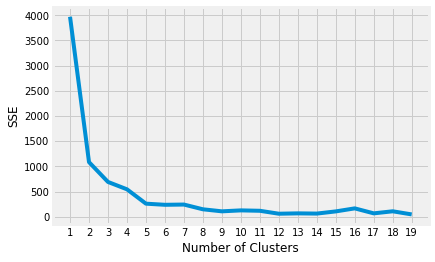

In [86]:
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Elbow method is a method that can be used for finding the right number of Clusters. By the look of the eye, it's difficult to judge the right cluster number, therefore we will use the 'kneed' library.

In [87]:
!pip install kneed

In [88]:
from kneed import KneeLocator

In [89]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [90]:
#Using 4 Clusters
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [91]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = month_level.index.values
cluster_map['cluster'] = kmeans.labels_

In [92]:
cluster_map.head()

,data_index,cluster
0,CA_1_HOBBIES_1,3
1,CA_1_HOBBIES_2,1
2,CA_1_HOUSEHOLD_1,3
3,CA_1_HOUSEHOLD_2,1
4,CA_1_FOODS_1,1


In [93]:
unique_clusters = cluster_map['cluster'].unique()
clusters = {}
for cluster in unique_clusters:
    similar_indices = cluster_map[cluster_map['cluster'] == cluster]['data_index']
    clusters[cluster] = similar_indices
clusters.keys()

dict_keys([3, 1, 0, 2])

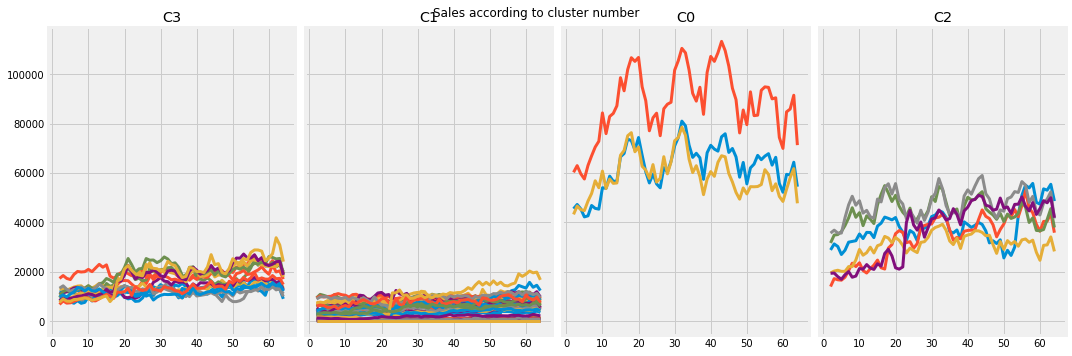

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
axes = axes.flatten()
ax_idx = 0
for key in clusters.keys():
    plt.axes(axes[ax_idx])
    cluster = clusters[key].values
    for i in range(0, len(cluster)):
        plt.plot(month_level.loc[cluster[i]],
                lw = 3,
            )
    ax_idx += 1
    plt.title("C" + str(key))
plt.suptitle('Sales according to cluster number')
plt.tight_layout()
plt.show()

The cluters has been differentiated based on the total number of items sold, each cluster has varying sales, and different lowest and highest sales. For example: C0 has stores_cat that have sales in range 50k to 100k, in contrast C3 have store_cat having sales in the range 0 to 20k.

In [95]:
clusters[0]

6     CA_1_FOODS_3
20    CA_3_FOODS_3
41    TX_2_FOODS_3
Name: data_index, dtype: object